# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Today, we will try to scrap Ethereum historical data from coingecko which is the world’s largest independent cryptocurrency data aggregator with over 12,000+ different cryptoassets tracked across more than 500+ exchanges worldwide. To note that the web scrapping on this sites is for fulfilling the capstone project only.

A lot of you might ask why we need to scrap this data from the sites while it already have a good visualisation. Let's say we have task to make a forecast on future Ethereum. To do that we need to have the data, and scrapping is a good way to collect the data we don't have from public. 

We will scrap 2 points from this sites. One is the date and the other one is Volume of the Ethereum on that date,


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
#pip install -r requirements.txt already installed in terminal
#copying the environment in txt

In [2]:
conda list --explicit > Reqcopy.txt


Note: you may need to restart the kernel to use updated packages.


In [3]:
#Currently coingecko added new protection to the websites hence the request process couldnt be done the usual way
#We put 'header' after the link

import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data#panel',  headers = { 'User-Agent': 'Popular browser\'s user-agent', })

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [4]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [5]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's see how our beautifulsoup looks like. As you can see, the content is the same with our `get_url` object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpouse we slice to only see first 500 character. 

In [6]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js">
  </script>
  <script async="" defer="" src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992">
  </script>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="/OpensearchDescription.xml" rel="search" type="applica


## Finding the right key to scrap the data & Extracting the right information

Now we already have a tidier html, now we should search the lines that we want to use. Let's see to our web page below.

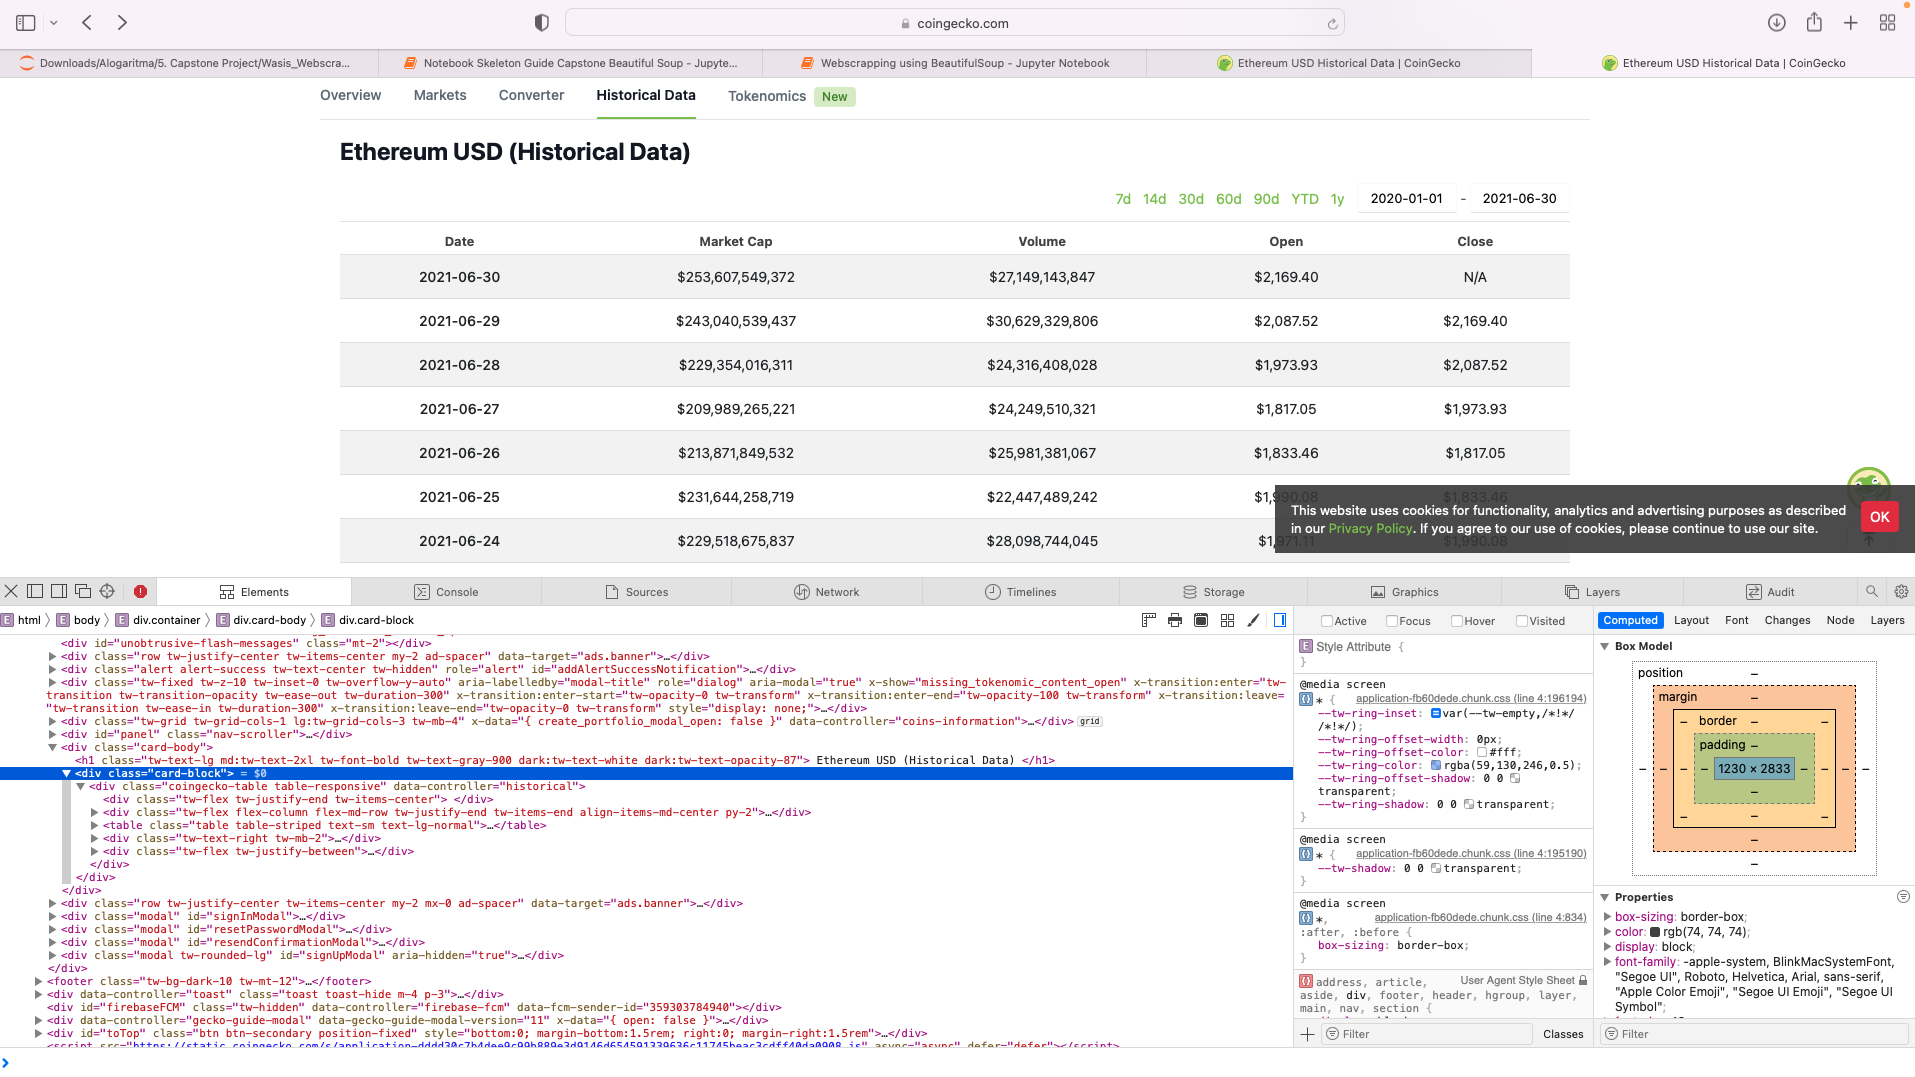

From inspect element we know that we need to find the line table with class `table table-striped text-sm text-lg-normal`. We can use the find method at our beautifusoup object. Let's also call our object to see what we get. 

In [7]:
table = soup.find('table' ,attrs={'class':'table table-striped text-sm text-lg-normal'})
print(type(table))

<class 'bs4.element.Tag'>


In [8]:
print(table.prettify()[1:600])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2022-10-01
   </th>
   <td class="text-center">
    $160,462,955,554
   </td>
   <td class="text-center">
    $11,849,125,784
   </td>
   <td class="text-center">
    $1,329.15
   </td>
   <td c


Now let's start Finding row length to extract some information

In [9]:
row = table.find_all('tr')
row_length = len(row)
row_length

31

now we know the length of our data, now here what we will do for the looping process. 

Here what the looping do to scrap the information: 

- First we need to establish a placeholder to receive the information that we scrap. 
- We named our placeholder `temp` and it's a list. 
- Then we will make a loop from one until the the length of the table row, 
- which we will find all cell which contain date and volume. 
- Then we will append it to our tuple that we prepared before, 
- every one iteration we will scrap one line of the table.  

In [10]:
#checking the range

temp = [] #init

for i in range(1, row_length):
    
    print('next______________',row[i])

#ok

next______________ <tr>
<th class="font-semibold text-center" scope="row">2022-10-01</th>
<td class="text-center">
$160,462,955,554
</td>
<td class="text-center">
$11,849,125,784
</td>
<td class="text-center">
$1,329.15
</td>
<td class="text-center">
N/A
</td>
</tr>
next______________ <tr>
<th class="font-semibold text-center" scope="row">2022-09-30</th>
<td class="text-center">
$161,267,455,734
</td>
<td class="text-center">
$11,834,328,252
</td>
<td class="text-center">
$1,335.74
</td>
<td class="text-center">
$1,329.15
</td>
</tr>
next______________ <tr>
<th class="font-semibold text-center" scope="row">2022-09-29</th>
<td class="text-center">
$161,716,193,676
</td>
<td class="text-center">
$16,571,161,476
</td>
<td class="text-center">
$1,340.02
</td>
<td class="text-center">
$1,335.74
</td>
</tr>
next______________ <tr>
<th class="font-semibold text-center" scope="row">2022-09-28</th>
<td class="text-center">
$160,800,122,125
</td>
<td class="text-center">
$16,685,874,856
</td>
<t

In [11]:
#cek slicer volume

print(row[3])

#ok

<tr>
<th class="font-semibold text-center" scope="row">2022-09-29</th>
<td class="text-center">
$161,716,193,676
</td>
<td class="text-center">
$16,571,161,476
</td>
<td class="text-center">
$1,340.02
</td>
<td class="text-center">
$1,335.74
</td>
</tr>


In [12]:
#cek date

row[3].th.text

#ok

'2022-09-29'

In [13]:
#cek volume

row[3].find_all('td')[1].text.strip()

#ok

'$16,571,161,476'

In [14]:
#Scrapping

temp = [] #init

for i in range(1, row_length):
    
    #get date 
    date = row[i].th.text
    
    #get volume
    volume = row[i].find_all('td')[1].text
    volume = volume.strip() #to remove excess white space
    
    temp.append((date,volume)) 
    
temp 

[('2022-10-01', '$11,849,125,784'),
 ('2022-09-30', '$11,834,328,252'),
 ('2022-09-29', '$16,571,161,476'),
 ('2022-09-28', '$16,685,874,856'),
 ('2022-09-27', '$15,270,197,376'),
 ('2022-09-26', '$10,552,647,870'),
 ('2022-09-25', '$11,251,326,609'),
 ('2022-09-24', '$17,599,766,731'),
 ('2022-09-23', '$17,517,188,721'),
 ('2022-09-22', '$18,732,743,242'),
 ('2022-09-21', '$13,605,986,462'),
 ('2022-09-20', '$17,757,533,838'),
 ('2022-09-19', '$14,696,599,277'),
 ('2022-09-18', '$10,309,763,882'),
 ('2022-09-17', '$17,892,819,035'),
 ('2022-09-16', '$24,787,864,367'),
 ('2022-09-15', '$17,198,033,718'),
 ('2022-09-14', '$22,286,700,927'),
 ('2022-09-13', '$16,770,566,236'),
 ('2022-09-12', '$11,692,754,175'),
 ('2022-09-11', '$12,521,808,521'),
 ('2022-09-10', '$19,418,675,071'),
 ('2022-09-09', '$16,676,188,643'),
 ('2022-09-08', '$18,560,005,397'),
 ('2022-09-07', '$20,860,201,644'),
 ('2022-09-06', '$11,815,125,729'),
 ('2022-09-05', '$7,827,505,125'),
 ('2022-09-04', '$8,500,114,3

That the result we get, At this point we can input it to a pandas' DataFrame and do usual data analysis, but if we notice the original webpage give us reversed information. To do a further analysis let's reverse our list first.

In [15]:
#reverse information

temp = temp[::-1]
temp

[('2022-09-02', '$15,076,286,517'),
 ('2022-09-03', '$15,857,654,357'),
 ('2022-09-04', '$8,500,114,334'),
 ('2022-09-05', '$7,827,505,125'),
 ('2022-09-06', '$11,815,125,729'),
 ('2022-09-07', '$20,860,201,644'),
 ('2022-09-08', '$18,560,005,397'),
 ('2022-09-09', '$16,676,188,643'),
 ('2022-09-10', '$19,418,675,071'),
 ('2022-09-11', '$12,521,808,521'),
 ('2022-09-12', '$11,692,754,175'),
 ('2022-09-13', '$16,770,566,236'),
 ('2022-09-14', '$22,286,700,927'),
 ('2022-09-15', '$17,198,033,718'),
 ('2022-09-16', '$24,787,864,367'),
 ('2022-09-17', '$17,892,819,035'),
 ('2022-09-18', '$10,309,763,882'),
 ('2022-09-19', '$14,696,599,277'),
 ('2022-09-20', '$17,757,533,838'),
 ('2022-09-21', '$13,605,986,462'),
 ('2022-09-22', '$18,732,743,242'),
 ('2022-09-23', '$17,517,188,721'),
 ('2022-09-24', '$17,599,766,731'),
 ('2022-09-25', '$11,251,326,609'),
 ('2022-09-26', '$10,552,647,870'),
 ('2022-09-27', '$15,270,197,376'),
 ('2022-09-28', '$16,685,874,856'),
 ('2022-09-29', '$16,571,161,4

## Creating data frame & Data wrangling

Put the array into dataframe

In [16]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date','volume'))
df.head()

,date,volume
0,2022-09-02,"$15,076,286,517"
1,2022-09-03,"$15,857,654,357"
2,2022-09-04,"$8,500,114,334"
3,2022-09-05,"$7,827,505,125"
4,2022-09-06,"$11,815,125,729"


In [17]:
#check our dataframe data types to see if our data is useable. 


df.dtypes

date      object
volume    object
dtype: object

the result show that both data are still regarded as objects, hence we need to adjut it so we can present it into a graph.
date -> datetime (since its show about period)
volume -> float64 (since we need to change the unit volume into numbers

In [18]:
df['date'] = df['date'].astype('datetime64')

In [23]:
df['volume'] = df['volume'].replace('[\$,]', '', regex=True).astype(float)

#or we can also use df['volume'] = df['volume'].replace(',','').replace('$','').astype('float')

In [24]:
df.dtypes

date      datetime64[ns]
volume           float64
dtype: object

to changes the volume, we use `replace` for the '$' sign as well as the ',' sign (we are not using str as the data here are string) then we change the format using `astype` similar to the one that we used to change the format for data. now the table are shown as below and compitable to transform into agraph

In [25]:
df.head()

,date,volume
0,2022-09-02,1.507629e+10
1,2022-09-03,1.585765e+10
2,2022-09-04,8.500114e+09
3,2022-09-05,7.827505e+09
4,2022-09-06,1.181513e+10


To make our plot behave like we want, we need to set our index of our dataframe to our time coloumn. We can use `set_index()` 

In [26]:
df = df.set_index('date')

and here is our graph

<AxesSubplot:xlabel='date'>

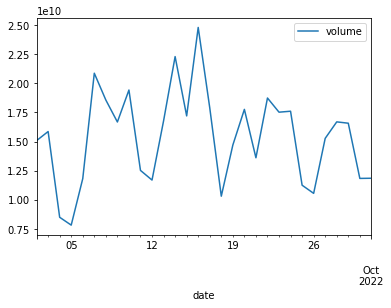

In [27]:
df.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

here is the result in the flask dashboard 

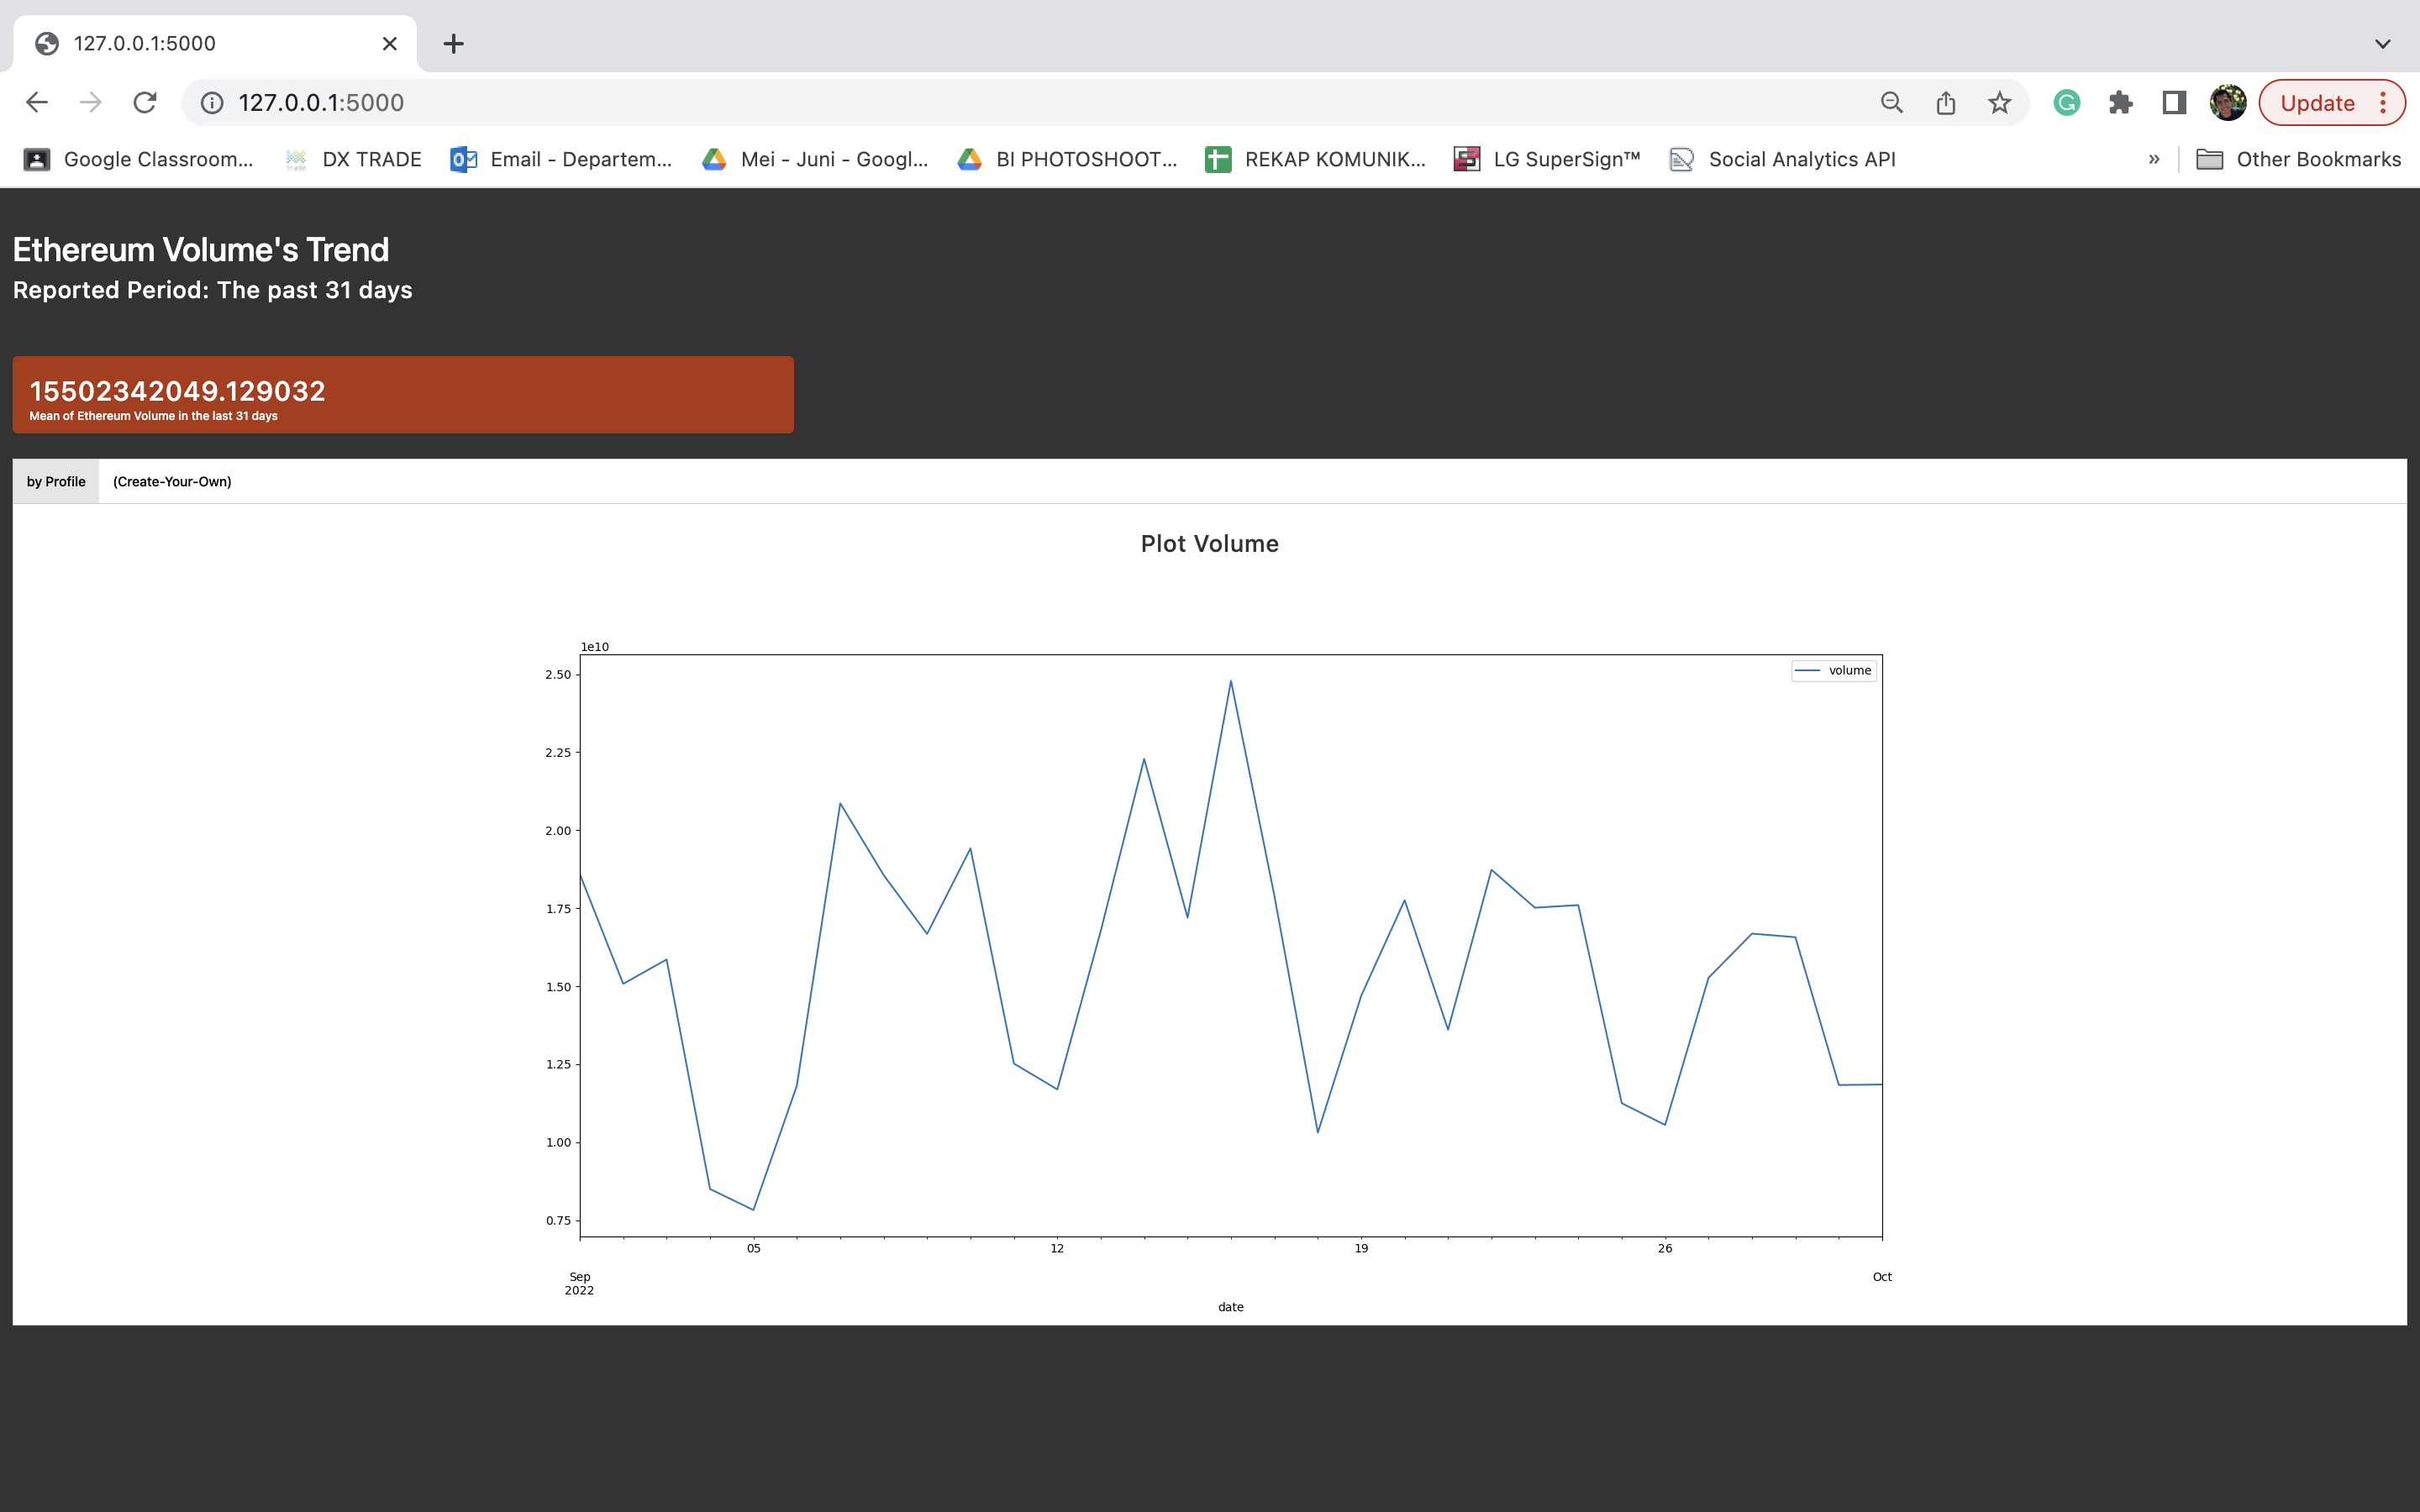

based on the graph above, the volume of etherium in the past 31 days were very fluctuative. as we can see the highest etherium volume was in 16th of September 2022 which peak up to almost 2.50 ($24,787,864,367).

Meanwhile the lowest was in 5th of September 2022 which show as down to as low as 0.75 ($7,827,505,125). 

Currently the volume trend show downturn after two consecutive rebound in 27th and 28th. 

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.